In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import dateutil
import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# Load Data, parse Crash Date info
data = pd.read_csv("Motor_Vehicle_Collisions_Crashes_NYPD.csv", low_memory = False)
data['CRASH DATE'] = data['CRASH DATE'].apply(dateutil.parser.parse, dayfirst=True)

In [3]:
# Extract year, month info
data['year'] = pd.DatetimeIndex(data['CRASH DATE']).year
data['month'] = pd.DatetimeIndex(data['CRASH DATE']).month
data['season'] = (data['month']%12 + 3)//3
seasons = {1: '1 Winter', 2: '2 Spring', 3: '3 Summer', 4: '4 Autumn'}
data['season_name'] = data['season'].map(seasons)
data.head()

CRASH DATE CRASH TIME BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0 2021-02-02       0:00     NaN      NaN        NaN        NaN   
1 2021-01-02       0:15     NaN      NaN        NaN        NaN   
2 2021-01-02      15:30     NaN      NaN  40.697815   -73.7602   
3 2021-01-02       2:35     NaN      NaN        NaN        NaN   
4 2020-10-27       9:00     NaN      NaN        NaN        NaN   

                LOCATION                    ON STREET NAME CROSS STREET NAME  \
0                    NaN  NEW ENGLAND THRUWAY                            NaN   
1                    NaN  QUEENSBORO BRIDGE UPPER                        NaN   
2  (40.697815, -73.7602)  114 ROAD                                       NaN   
3                    NaN  PROSPECT EXPRESSWAY RAMP                       NaN   
4                    NaN  BRUCKNER EXPRESSWAY                            NaN   

  OFF STREET NAME  ...  COLLISION_ID                  VEHICLE TYPE CODE 1  \
0             NaN  ...       4388602                                Sedan   
1             NaN  ...       4388510                                Sedan   
2             NaN  ...       4388639                                Sedan   
3             NaN  ...       4388200  Station Wagon/Sport Utility Vehicle   
4             NaN  ...       4361834                           commercial   

   VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  \
0                  NaN                  NaN                  NaN   
1                Sedan                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                Sedan                  NaN                  NaN   

   VEHICLE TYPE CODE 5  year  month season season_name  
0                  NaN  2021      2      1    1 Winter  
1                  NaN  2021      1      1    1 Winter  
2                  NaN  2021      1      1    1 Winter  
3                  NaN  2021      1      1    1 Winter  
4                  NaN  2020     10      4    4 Autumn  

[5 rows x 33 columns]

In [4]:
data.shape

(1752514, 33)

In [5]:
df = data.dropna(subset=['LATITUDE', 'LONGITUDE'])
df.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
2  2021-01-02      15:30        NaN      NaN  40.697815  -73.76020   
18 2021-01-26      22:12        NaN      NaN  40.724667  -73.82076   
29 2021-01-19      14:40        NaN      NaN  40.866447  -73.93050   
31 2021-01-19       8:22  MANHATTAN    10000  40.774708  -73.97469   
32 2021-01-19       9:20     QUEENS    11354  40.761047  -73.83518   

                  LOCATION                    ON STREET NAME  \
2    (40.697815, -73.7602)  114 ROAD                           
18  (40.724667, -73.82076)  73 AVENUE                          
29   (40.866447, -73.9305)  RIVERSIDE DRIVE                    
31  (40.774708, -73.97469)  WEST DRIVE                         
32  (40.761047, -73.83518)  COLLEGE POINT BOULEVARD            

   CROSS STREET NAME OFF STREET NAME  ...  COLLISION_ID  VEHICLE TYPE CODE 1  \
2                NaN             NaN  ...       4388639                Sedan   
18       MAIN STREET             NaN  ...       4387384                  NaN   
29               NaN             NaN  ...       4385331                Sedan   
31       OLMSTED WAY             NaN  ...       4385270                 Bike   
32           36 ROAD             NaN  ...       4385175                Sedan   

                    VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
2                                   NaN                  NaN   
18                                  NaN                  NaN   
29                                  NaN                  NaN   
31                                  NaN                  NaN   
32  Station Wagon/Sport Utility Vehicle                  NaN   

    VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  year  month season season_name  
2                   NaN                  NaN  2021      1      1    1 Winter  
18                  NaN                  NaN  2021      1      1    1 Winter  
29                  NaN                  NaN  2021      1      1    1 Winter  
31                  NaN                  NaN  2021      1      1    1 Winter  
32                  NaN                  NaN  2021      1      1    1 Winter  

[5 rows x 33 columns]

In [6]:
df.shape

(1544467, 33)

In [ ]:
df.head()

In [2]:
import dill

In [5]:
dill.dump(df, open('df.pkd', 'wb'))

NameError: name 'df' is not defined

In [3]:
df = dill.load(open('df.pkd', 'rb'))

In [4]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

In [5]:
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_boroughs.head()

BoroCode       BoroName    Shape_Leng    Shape_Area  \
0         5  Staten Island  330385.03697  1.623853e+09   
1         4         Queens  861038.47930  3.049947e+09   
2         3       Brooklyn  726568.94634  1.959432e+09   
3         1      Manhattan  358532.95642  6.364422e+08   
4         2          Bronx  464517.89055  1.186804e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [5]:
import shapely

In [13]:
gdf = gpd.GeoDataFrame(df.drop(['LATITUDE', 'LONGITUDE'], axis=1),
                       crs={'init': 'epsg:4326'},
                       geometry=[shapely.geometry.Point(xy)
                                 for xy in zip(df.LONGITUDE, df.LATITUDE)])

C:\Users\Uriel\anaconda3\envs\geo-env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
dill.dump(gdf, open('gdf.pkd', 'wb'))

In [6]:
gdf = dill.load(open('gdf.pkd', 'rb'))

C:\Users\Uriel\anaconda3\envs\geo-env\lib\site-packages\pyproj\crs\crs.py:292: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [13]:
gdf.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE                LOCATION  \
2  2021-01-02      15:30        NaN      NaN   (40.697815, -73.7602)   
18 2021-01-26      22:12        NaN      NaN  (40.724667, -73.82076)   
29 2021-01-19      14:40        NaN      NaN   (40.866447, -73.9305)   
31 2021-01-19       8:22  MANHATTAN    10000  (40.774708, -73.97469)   
32 2021-01-19       9:20     QUEENS    11354  (40.761047, -73.83518)   

                      ON STREET NAME CROSS STREET NAME OFF STREET NAME  \
2   114 ROAD                                       NaN             NaN   
18  73 AVENUE                              MAIN STREET             NaN   
29  RIVERSIDE DRIVE                                NaN             NaN   
31  WEST DRIVE                             OLMSTED WAY             NaN   
32  COLLEGE POINT BOULEVARD                    36 ROAD             NaN   

    NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  ...  \
2                         0.0                       0.0  ...   
18                        1.0                       0.0  ...   
29                        0.0                       0.0  ...   
31                        1.0                       0.0  ...   
32                        0.0                       0.0  ...   

    VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
2                 Sedan                                  NaN   
18                  NaN                                  NaN   
29                Sedan                                  NaN   
31                 Bike                                  NaN   
32                Sedan  Station Wagon/Sport Utility Vehicle   

    VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  year month  \
2                   NaN                  NaN                  NaN  2021     1   
18                  NaN                  NaN                  NaN  2021     1   
29                  NaN                  NaN                  NaN  2021     1   
31                  NaN                  NaN                  NaN  2021     1   
32                  NaN                  NaN                  NaN  2021     1   

   season season_name                    geometry  
2       1    1 Winter  POINT (-73.76020 40.69781)  
18      1    1 Winter  POINT (-73.82076 40.72467)  
29      1    1 Winter  POINT (-73.93050 40.86645)  
31      1    1 Winter  POINT (-73.97469 40.77471)  
32      1    1 Winter  POINT (-73.83518 40.76105)  

[5 rows x 32 columns]

In [14]:
gdf.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                 object
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3            object
CONTRIBUTING FACTOR VEHICLE 4            object
CONTRIBUTING FACTOR VEHICLE 5           

In [15]:
gdf['CRASH DATE'] = gdf['CRASH DATE'].astype(str)

In [10]:
import matplotlib.pyplot as plt

<Figure size 1440x720 with 0 Axes>

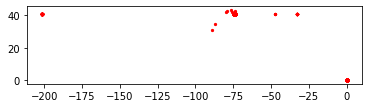

In [22]:
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig = plt.figure(figsize=(20,10))
proj = projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
base = nyc_boroughs.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.show()

In [23]:
nyc_fatal_collisions = gpd.read_file(gplt.datasets.get_path('nyc_fatal_collisions'))
nyc_fatal_collisions.head()

id  NUMBER OF PERSONS KILLED        BOROUGH                    geometry
0    551                         1       BROOKLYN  POINT (-73.95957 40.68668)
1   2412                         1  STATEN ISLAND  POINT (-74.14710 40.54101)
2  41035                         1          BRONX  POINT (-73.90904 40.86268)
3  41933                         1          BRONX  POINT (-73.91475 40.82520)
4  42664                         1      MANHATTAN  POINT (-74.00835 40.74470)

In [24]:
nyc_map = gpd.read_file("pluto full")

In [25]:
dill.dump(nyc_map, open('nyc_map.pkd', 'wb'))

In [26]:
nyc_map = dill.load(open('nyc_map.pkd', 'rb'))

In [27]:
nyc_map.head(20)

address           bbl  \
0               71-41 66 ROAD  4.030520e+09   
1             66-31 71 STREET  4.030530e+09   
2             66-33 71 STREET  4.030530e+09   
3             66-35 71 STREET  4.030530e+09   
4   66-36 PLEASANTVIEW STREET  4.030530e+09   
5   66-38 PLEASANTVIEW STREET  4.030530e+09   
6   66-40 PLEASANTVIEW STREET  4.030530e+09   
7             66-28 71 STREET  4.030540e+09   
8             66-27 70 STREET  4.030540e+09   
9             66-29 70 STREET  4.030540e+09   
10            66-33 70 STREET  4.030540e+09   
11            66-63 70 STREET  4.030540e+09   
12            66-59 70 STREET  4.030540e+09   
13            66-57 70 STREET  4.030540e+09   
14            66-55 70 STREET  4.030540e+09   
15  66-78 METROPOLITAN AVENUE  4.030540e+09   
16            66-71 70 STREET  4.030540e+09   
17            66-69 70 STREET  4.030540e+09   
18            66-38 71 STREET  4.030540e+09   
19  71-17 METROPOLITAN AVENUE  4.030550e+09   

                                             geometry  
0   POLYGON ((-73.88264 40.71444, -73.88260 40.714...  
1   POLYGON ((-73.88360 40.71393, -73.88362 40.713...  
2   POLYGON ((-73.88362 40.71376, -73.88362 40.713...  
3   POLYGON ((-73.88362 40.71370, -73.88363 40.713...  
4   POLYGON ((-73.88284 40.71389, -73.88244 40.713...  
5   POLYGON ((-73.88243 40.71378, -73.88282 40.713...  
6   POLYGON ((-73.88242 40.71369, -73.88280 40.713...  
7   POLYGON ((-73.88430 40.71387, -73.88431 40.713...  
8   POLYGON ((-73.88466 40.71382, -73.88501 40.713...  
9   POLYGON ((-73.88466 40.71382, -73.88466 40.713...  
10  POLYGON ((-73.88466 40.71375, -73.88467 40.713...  
11  POLYGON ((-73.88473 40.71293, -73.88473 40.712...  
12  POLYGON ((-73.88472 40.71300, -73.88473 40.712...  
13  POLYGON ((-73.88472 40.71306, -73.88472 40.713...  
14  POLYGON ((-73.88471 40.71313, -73.88472 40.713...  
15  POLYGON ((-73.88441 40.71258, -73.88443 40.712...  
16  POLYGON ((-73.88473 40.71266, -73.88473 40.712...  
17  POLYGON ((-73.88506 40.71273, -73.88472 40.712...  
18  POLYGON ((-73.88432 40.71360, -73.88433 40.713...  
19  POLYGON ((-73.88386 40.71261, -73.88371 40.712...

<GeoAxesSubplot:>

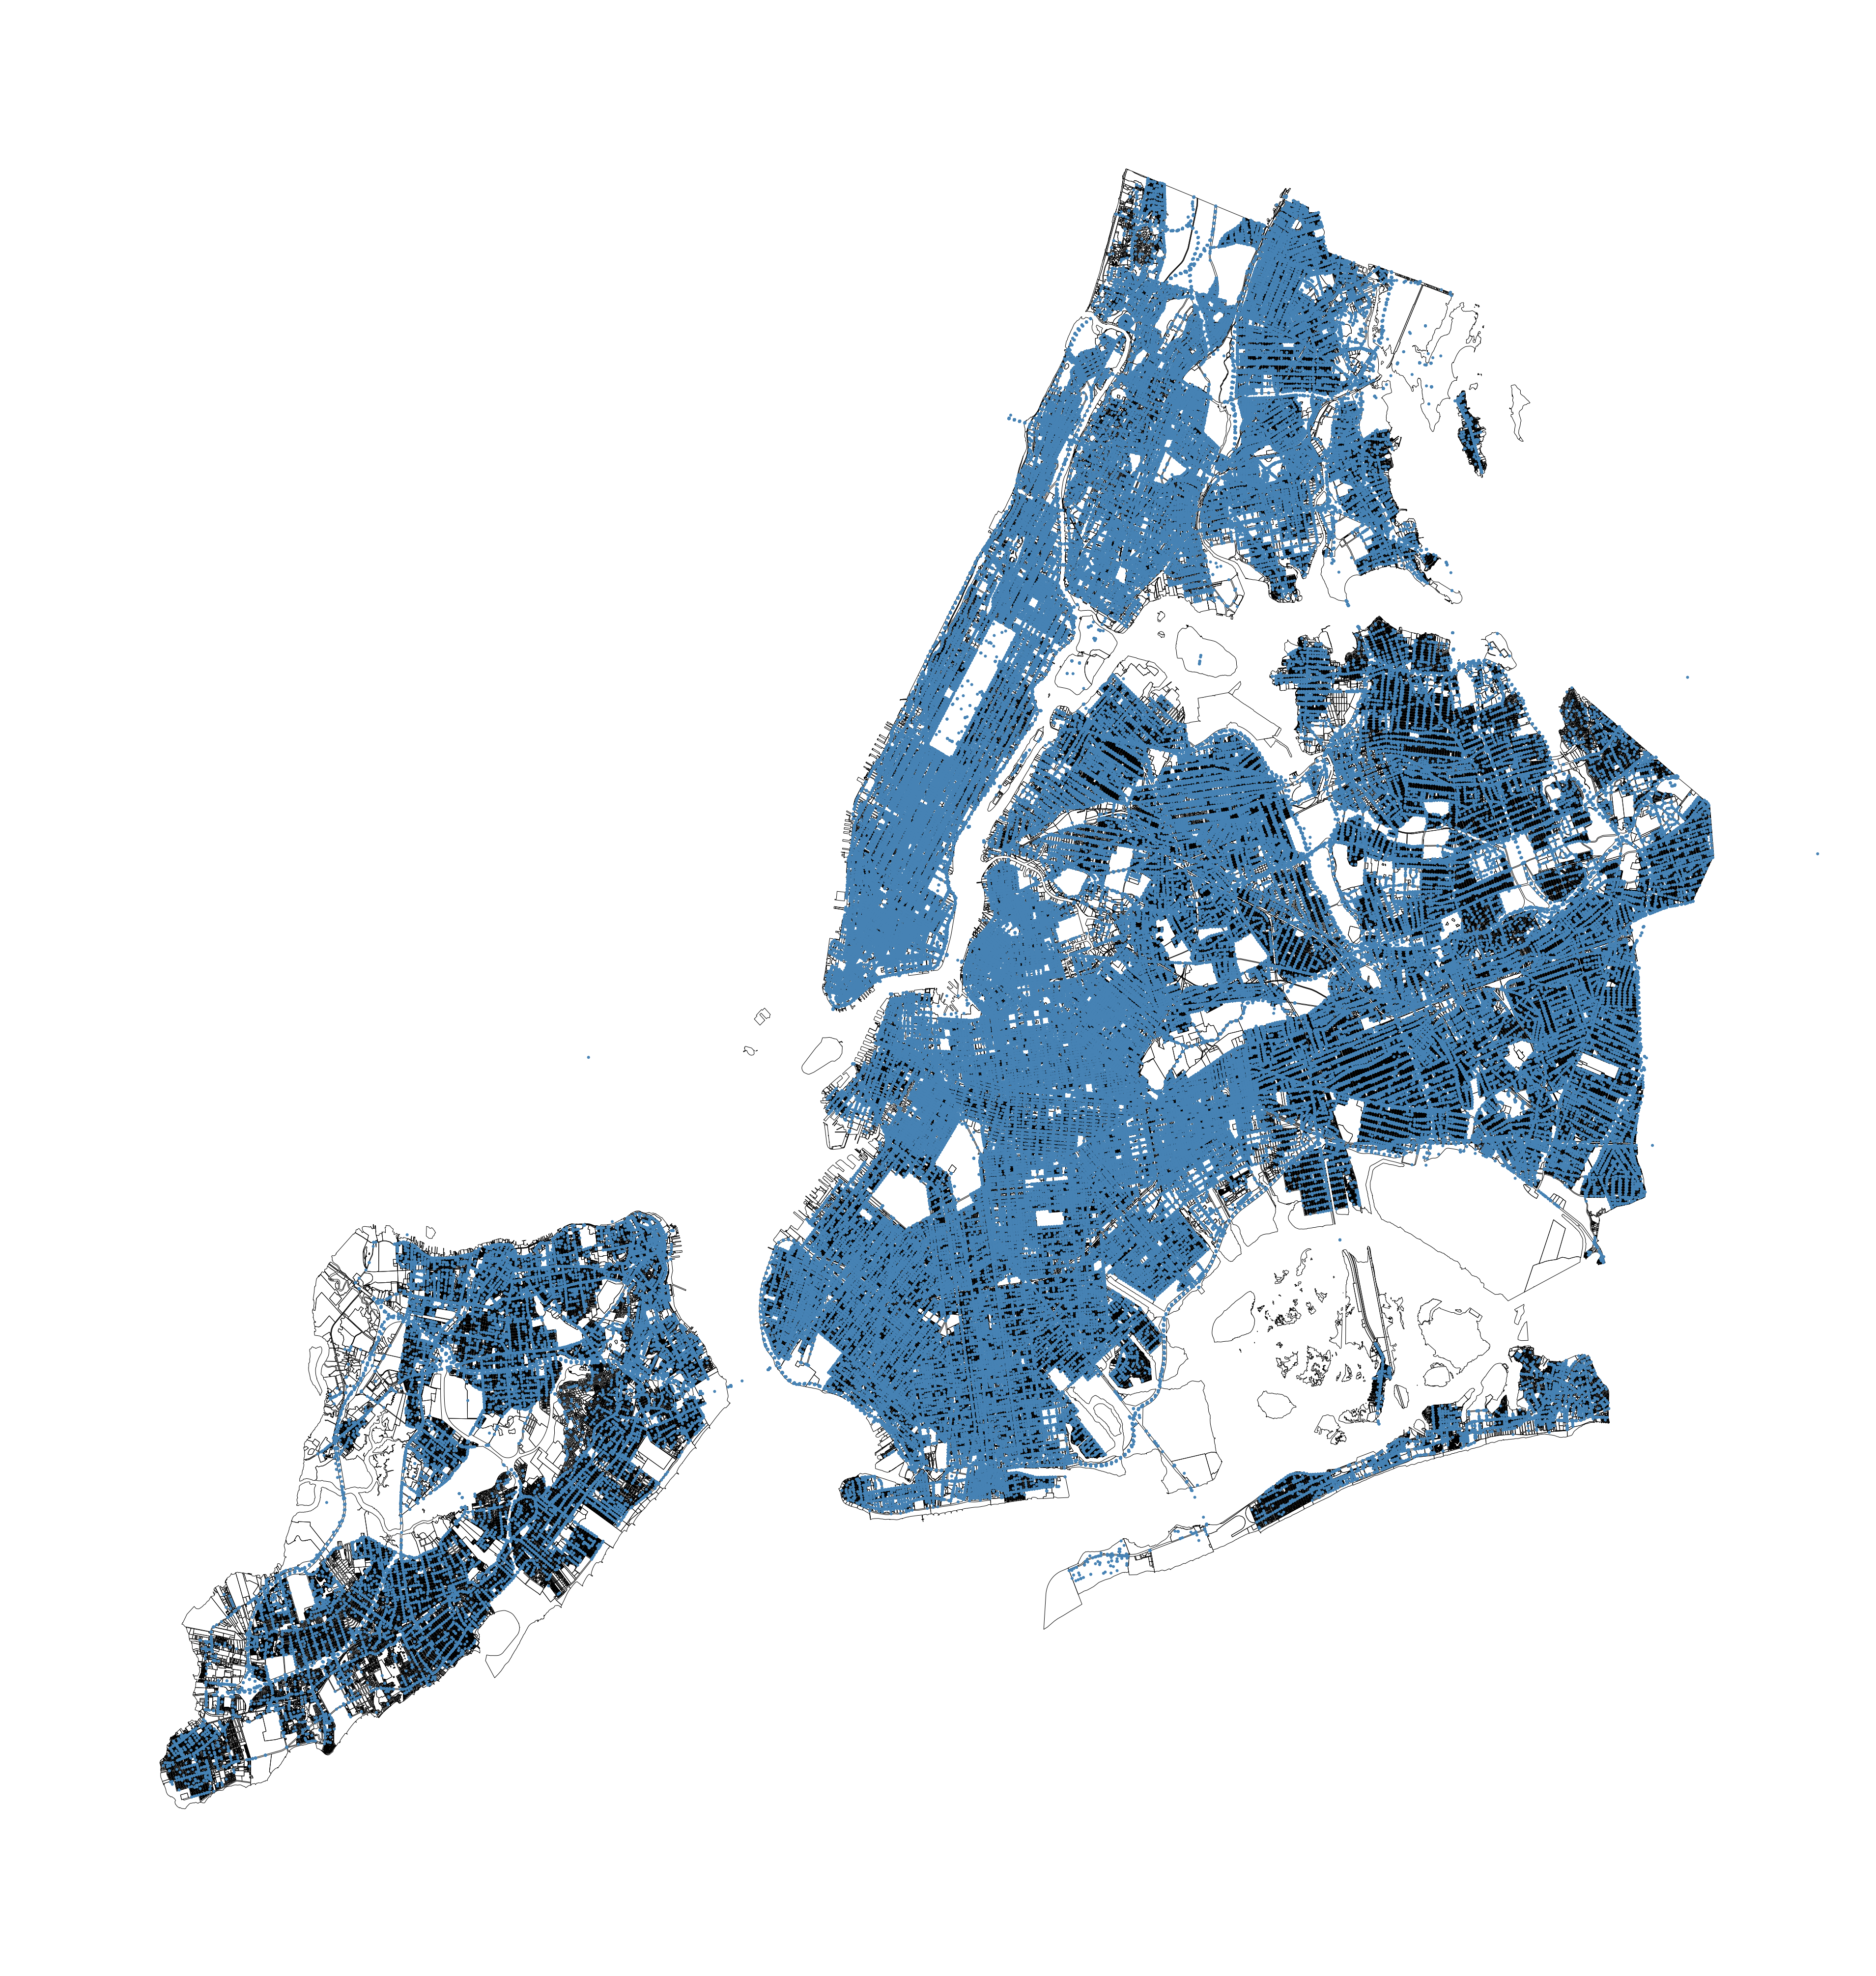

In [50]:
fig = plt.figure(figsize=(150, 100))
proj = projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
ax1 = plt.subplot(121, projection=proj)
ax1 = gplt.pointplot(
    gdf, projection=proj,
    ax=ax1
)
gplt.polyplot(nyc_map, ax=ax1)

In [ ]:
fig = plt.figure(figsize=(800, 200))
proj = projection=gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
ax1 = plt.subplot(121, projection=proj)
ax1 = gplt.pointplot(
    gdf, projection=proj,
    ax=ax1
)
gplt.polyplot(nyc_map, ax=ax1)

In [7]:
import mplleaflet

<Figure size 10800x7200 with 0 Axes>

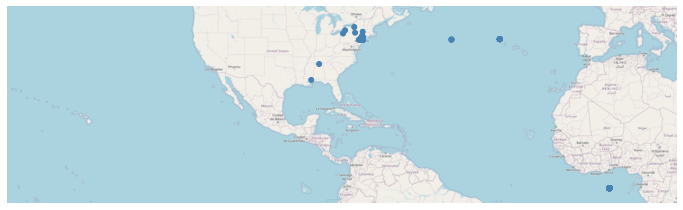

In [29]:
fig = plt.figure(figsize=(150, 100))
#ax = gplt.kdeplot(gdf, cmap='viridis', projection=gcrs.WebMercator(), figsize=(12, 12), shade=True)
proj = projection=gcrs.WebMercator()
ax = gplt.webmap(gdf, projection=proj, figsize=(12, 12))
gplt.pointplot(gdf, projection=gcrs.WebMercator(), ax=ax)
#gplt.webmap(gdf)
fig1 = plt.gcf()

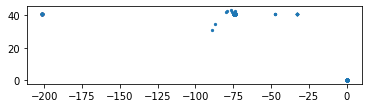

In [29]:
ax = gdf.plot(markersize = 5)

In [32]:
mplleaflet.display(fig = ax.figure)

C:\Users\Uriel\anaconda3\envs\geo-env\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Users\Uriel\anaconda3\envs\geo-env\lib\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


C:\Users\Uriel\anaconda3\envs\geo-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Uriel\anaconda3\envs\geo-env\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

<Figure size 10800x7200 with 0 Axes>

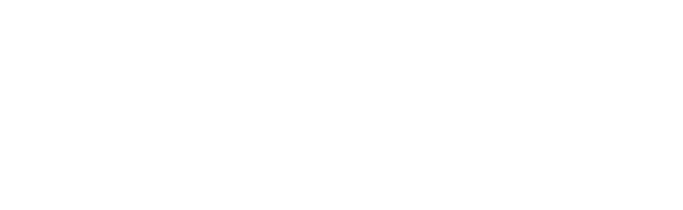

In [15]:
fig = plt.figure(figsize=(150, 100))
ax = gplt.kdeplot(gdf, cmap='viridis', projection=gcrs.WebMercator(), figsize=(12, 12), shade=True)
proj = projection=gcrs.WebMercator()
#ax = gplt.webmap(gdf, projection=proj, figsize=(12, 12))
gplt.pointplot(gdf, projection=gcrs.WebMercator(), ax=ax)
gplt.webmap(gdf, ax=ax)
fig = plt.gcf()

In [22]:
mplleaflet.show(fig)

In [14]:
fig = plt.figure(figsize=(20,10))
proj = projection=gcrs.WebMercator()
base = nyc_boroughs.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)
fig = plt.gcf()

NameError: name 'nyc_boroughs' is not defined

<Figure size 1440x720 with 0 Axes>

In [25]:
mplleaflet.show()

In [8]:
from IPython.display import IFrame
import ipyleaflet
import ipywidgets
from ipyleaflet import basemaps, GeoData, Map, Marker, LayersControl, ZoomControl, WidgetControl
from ipywidgets import IntSlider, ColorPicker, jslink

In [31]:
m = Map(center=(52.204793, 360.121558), zoom=3, basemap= basemaps.Esri.WorldStreetMap)
geo_data = GeoData(geo_dataframe = gdf)
m.add_layer(geo_data)
m.add_control(LayersControl())
m

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [16]:
m = Map(center=(40.7, -73.9), zoom = 13)
zoom_slider = IntSlider(description='Zoom level:', min=0, max=15, value=7)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)
geo_data = GeoData(geo_dataframe = gdf)
m.add_layer(geo_data)
#m.add_control(LayersControl())
#m.add_control(ZoomControl(position='topleft'))
m

Map(center=[40.7, -73.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [12]:
m = Map(center=(40.7, -73.9), zoom = 10, basemap= basemaps.Esri.WorldStreetMap)
m

Map(center=[40.7, -73.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [38]:
gdf.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE                LOCATION  \
2   2021-01-02      15:30        NaN      NaN   (40.697815, -73.7602)   
18  2021-01-26      22:12        NaN      NaN  (40.724667, -73.82076)   
29  2021-01-19      14:40        NaN      NaN   (40.866447, -73.9305)   
31  2021-01-19       8:22  MANHATTAN    10000  (40.774708, -73.97469)   
32  2021-01-19       9:20     QUEENS    11354  (40.761047, -73.83518)   

                      ON STREET NAME CROSS STREET NAME OFF STREET NAME  \
2   114 ROAD                                       NaN             NaN   
18  73 AVENUE                              MAIN STREET             NaN   
29  RIVERSIDE DRIVE                                NaN             NaN   
31  WEST DRIVE                             OLMSTED WAY             NaN   
32  COLLEGE POINT BOULEVARD                    36 ROAD             NaN   

    NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  ...  \
2                         0.0                       0.0  ...   
18                        1.0                       0.0  ...   
29                        0.0                       0.0  ...   
31                        1.0                       0.0  ...   
32                        0.0                       0.0  ...   

    VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
2                 Sedan                                  NaN   
18                  NaN                                  NaN   
29                Sedan                                  NaN   
31                 Bike                                  NaN   
32                Sedan  Station Wagon/Sport Utility Vehicle   

    VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  year month  \
2                   NaN                  NaN                  NaN  2021     1   
18                  NaN                  NaN                  NaN  2021     1   
29                  NaN                  NaN                  NaN  2021     1   
31                  NaN                  NaN                  NaN  2021     1   
32                  NaN                  NaN                  NaN  2021     1   

   season season_name                    geometry  
2       1    1 Winter  POINT (-73.76020 40.69781)  
18      1    1 Winter  POINT (-73.82076 40.72467)  
29      1    1 Winter  POINT (-73.93050 40.86645)  
31      1    1 Winter  POINT (-73.97469 40.77471)  
32      1    1 Winter  POINT (-73.83518 40.76105)  

[5 rows x 32 columns]

In [9]:
df2 = df[['LATITUDE', 'LONGITUDE']][:20000]

In [10]:
gdf2 = gpd.GeoDataFrame(df2.drop(['LATITUDE', 'LONGITUDE'], axis=1),
                       crs={'init': 'epsg:4326'},
                       geometry=[shapely.geometry.Point(xy)
                                 for xy in zip(df2.LONGITUDE, df2.LATITUDE)])

C:\Users\Uriel\anaconda3\envs\geo-env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [11]:
gdf2.head()

geometry
2   POINT (-73.76020 40.69781)
18  POINT (-73.82076 40.72467)
29  POINT (-73.93050 40.86645)
31  POINT (-73.97469 40.77471)
32  POINT (-73.83518 40.76105)

In [19]:
m = Map(center=(40.7, -73.9), zoom = 13)
m

Map(center=[40.7, -73.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [20]:
geo_data2 = GeoData(geo_dataframe = gdf2,
    style={'color': 'black', 'radius':2, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 2, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Release')
m.add_layer(geo_data2)
m
#m.save('my_map.html', title='My Map')

Map(bottom=788787.0, center=[40.7, -73.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in…

In [12]:
from ipyleaflet import CircleMarker
from ipyleaflet import MarkerCluster

In [17]:
m = Map(center=(40.7, -73.9), zoom = 10, basemap= basemaps.Esri.WorldStreetMap)
m

Map(center=[40.7, -73.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [13]:
df2 = df[['LATITUDE', 'LONGITUDE']][:2000]
df2

LATITUDE  LONGITUDE
2     40.697815 -73.760200
18    40.724667 -73.820760
29    40.866447 -73.930500
31    40.774708 -73.974690
32    40.761047 -73.835180
...         ...        ...
2444  40.676920 -73.924805
2445  40.728820 -73.953670
2446  40.604023 -73.978930
2447  40.669403 -73.942210
2448  40.649395 -73.941700

[2000 rows x 2 columns]

In [16]:
markers = []
for lon, lat in df2[["LONGITUDE", "LATITUDE"]].values:
    circle = CircleMarker(location=(lat, lon), color="black", fill_color="black", weight=3)
    markers.append(circle)
marker_cluster = MarkerCluster(markers=markers)
m.add_layer(marker_cluster)

m

Map(bottom=98773.0, center=[40.7, -73.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_…

In [21]:
map2 = Map(center=(40.7, -73.9), zoom = 10, basemap= basemaps.Esri.WorldStreetMap)

In [ ]:
markers = []
for lon, lat in df[["LONGITUDE", "LATITUDE"]].values:
    circle = CircleMarker(location=(lat, lon), color="black", fill_color="black", weight=3)
    markers.append(circle)
marker_cluster = MarkerCluster(markers=markers)
map2.add_layer(marker_cluster)

#m.layout.height="700px"

map2

In [20]:
from ipywidgets.embed import embed_minimal_html
embed_minimal_html('my_map.html', views=[m],title='My Map')
#m.save('my_map.html', title='My Map')

In [1]:
pip install keplergl

In [3]:
from keplergl import KeplerGl
map = KeplerGl(height=600, width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [41]:
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
year = Dropdown(options = list(range(2012,2022)))
month = Dropdown(options =list(range(1,13)))
output = widgets.Output()

def common_filtering(year, month):
    output.clear_output()
    temp = df[(df['year'] == year) & (df['month'] == month)]
    df_filtered = temp[['LATITUDE', 'LONGITUDE']]
    
    with output:
        display(df_filtered)

def dropdown_year(year):
    common_filtering(year.new, month.value)

def dropdown_month(month):
    common_filtering(year.value, month.new)

year.observe(dropdown_year, names='value')
month.observe(dropdown_month, names='value')

display(year)
display(month)
display(output)

Dropdown(options=(2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021), value=2012)

Dropdown(options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

Output()

In [50]:
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
year = Dropdown(options = list(range(2012,2022)))
month = Dropdown(options =list(range(1,13)))
output = widgets.Output()

def common_filtering(year, month):
    output.clear_output()
    global output_dataframe
    temp = df[(df['year'] == year) & (df['month'] == month)]
    df_filtered = temp[['LATITUDE', 'LONGITUDE']]
    
    with output:
        output_dataframe = df_filtered
        display(output_dataframe)

def dropdown_year(year):
    common_filtering(year.new, month.value)

def dropdown_month(month):
    common_filtering(year.value, month.new)

year.observe(dropdown_year, names='value')
month.observe(dropdown_month, names='value')

display(year)
display(month)
display(output)

Dropdown(options=(2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021), value=2012)

Dropdown(options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

Output()

In [54]:
output_dataframe

LATITUDE  LONGITUDE
566442  40.627724 -73.942280
566445  40.620230 -74.165350
566447  40.732243 -73.870130
566451  40.692310 -73.881470
566488  40.880535 -73.832120
...           ...        ...
798354  40.884280 -73.857185
798437  40.660360 -73.881546
798475  40.665627 -73.909706
798480  40.629005 -73.991220
798538  40.634468 -73.992710

[17684 rows x 2 columns]

In [55]:
map2 = Map(center=(40.7, -73.9), zoom = 10, basemap= basemaps.Esri.WorldStreetMap)

markers = []
for lon, lat in output_dataframe[["LONGITUDE", "LATITUDE"]].values:
    circle = CircleMarker(location=(lat, lon), color="black", fill_color="black", weight=3)
    markers.append(circle)
marker_cluster = MarkerCluster(markers=markers)
map2.add_layer(marker_cluster)
map2

Map(center=[40.7, -73.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…